In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp


In [ ]:
read_file = pd.read_csv (r'C:\Users\Johan\Downloads\dataset_TIST2015\dataset_TIST2015_POIs.txt', names=["Pid", "Latitude", "Longtitude", "Category", "Country"], sep='\t')
read_file.to_csv (r'C:\Users\Johan\Documents\POI_dataset\TIST2015_POIs.csv', index=None)

In [4]:
read_file = pd.read_csv (r'C:\Users\Johan\Downloads\dataset_TIST2015\dataset_TIST2015_Checkins.txt', names=["Uid","Pid","Timestamp", "TimezoneOffset"], sep='\t')
read_file.to_csv (r'C:\Users\Johan\Documents\POI_dataset\TIST2015_Checkins.csv', index=None)

In [3]:
def read_data(path):
    files = {}
    for filename in path.glob('*'):
        if filename.suffix == '.csv':
            files[filename.stem] = pd.read_csv(filename)
        elif filename.suffix == '.txt':
            if filename.stem == "TIST2015_POIs":
                columns = ["Pid", "Latitude", "Longtitude", "Category", "Country"]
            elif filename.stem == "TIST2015_POIs_Checkins":
                columns = ["Uid","Pid","Timestamp", "TimezoneOffset"]
            else:
                continue
            data = pd.read_csv(filename, names=columns, engine='python')
            files[filename.stem] = data

    return files['TIST2015_POIs'], files['TIST2015_Checkins']

In [4]:
# pick one of the available folders
pois, checkins = read_data(Path(r'C:\Users\Johan\Documents\POI_dataset'))


In [13]:
users_subset = user_checkins_counts['Uid'].unique()
len(users_subset)
checkins.sample(users_subset, 1000)
##users_subset=checkins.loc[checkins['Uid'] <= 1000, 'Pid']
##users_subset


##checkins.head()

ValueError: Please enter a value for `frac` OR `n`, not both

<AxesSubplot:ylabel='Frequency'>

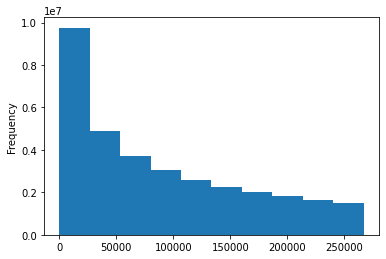

In [21]:
checkins["Uid"].plot(kind='hist')


In [25]:
checkins.describe(include=object)

,Pid,Timestamp
count,33263633,33263633
unique,3680126,17831682
top,4b49cb0ff964a520b67326e3,Tue Jun 12 06:32:06 +0000 2012
freq,34509,33


In [23]:
checkins["Uid"].value_counts()


2         5430
3         4822
7         4284
10        4104
4         4024
          ... 
226915       1
179          1
168384       1
142677       1
70957        1
Name: Uid, Length: 266909, dtype: int64

In [14]:
user_checkins_counts = checkins.groupby('Uid')['Pid'].count()

In [5]:
# Create a subset of a dataset with size n users
def create_checkin_subset(checkins_table, n):
    subset = np.array([[0,0,0,0],[0,0,0,0]])
    checkins_100_users = checkins_table['Uid'].sample(n=n, random_state=1)
    for i in checkins_100_users:
        subset = np.append(subset, np.asarray(checkins_table[checkins_table['Uid'] == i].values), 0)
    return pd.DataFrame(subset[2::], columns=['Uid', 'Pid', 'Timestamp', 'TimezoneOffset'])

In [6]:
# Initialize the subset method
checkins_100_users = create_checkin_subset(checkins, 100)

In [75]:
checkins_100_users
##points_checkins_counts = checkins.groupby('Pid')['Uid'].count()

,Uid,Pid,Timestamp,TimezoneOffset
0,33634,4ef5d479f9ab2e6680a7fdda,Sun Feb 17 09:58:34 +0000 2013,120
1,33634,4e621c8d62e13e3bce7bb58d,Sun Feb 17 11:17:48 +0000 2013,120
2,33634,4cb0fb5af2dbef3b6aae79e5,Mon Feb 18 06:34:41 +0000 2013,120
3,33634,5110b08de4b0d12c384d4e0b,Mon Feb 18 06:38:31 +0000 2013,120
4,33634,4d446c883616b60c0435e4c2,Mon Feb 18 06:50:21 +0000 2013,120
...,...,...,...,...
27403,133844,4c03179c310fc9b65081c561,Tue Apr 09 05:14:53 +0000 2013,420
27404,133844,4d57d91bde8f6dcb55330491,Mon May 06 04:01:04 +0000 2013,420
27405,133844,4b30d634f964a520fbfb24e3,Fri Aug 09 10:30:07 +0000 2013,420
27406,133844,508e6a44e4b019412dbd3889,Tue Aug 20 13:06:36 +0000 2013,420


In [7]:
# Merge pois and checkins to one Dataframe
checkin_data = checkins_100_users.merge(pois, on='Pid')

In [8]:
checkin_data

,Uid,Pid,Timestamp,TimezoneOffset,Latitude,Longtitude,Category,Country
0,33634,4ef5d479f9ab2e6680a7fdda,Sun Feb 17 09:58:34 +0000 2013,120,37.775259,29.087312,Building,TR
1,33634,4ef5d479f9ab2e6680a7fdda,Tue Feb 19 09:56:56 +0000 2013,120,37.775259,29.087312,Building,TR
2,33634,4ef5d479f9ab2e6680a7fdda,Thu Feb 21 11:14:26 +0000 2013,120,37.775259,29.087312,Building,TR
3,33634,4ef5d479f9ab2e6680a7fdda,Fri Feb 22 10:03:35 +0000 2013,120,37.775259,29.087312,Building,TR
4,33634,4ef5d479f9ab2e6680a7fdda,Tue Feb 26 10:45:19 +0000 2013,120,37.775259,29.087312,Building,TR
...,...,...,...,...,...,...,...,...
27403,133844,4b9247bef964a520c9ef33e3,Mon Mar 25 13:13:28 +0000 2013,420,13.671964,100.533987,Thai Restaurant,TH
27404,133844,4c1cb294fcf8c9b6186eaa0b,Tue Mar 26 11:48:22 +0000 2013,420,13.663771,100.437445,Japanese Restaurant,TH
27405,133844,4eeff0e50e61196dc8772789,Fri Mar 29 19:33:41 +0000 2013,420,18.803591,99.018200,General Travel,TH
27406,133844,5033c299e4b0ca71ea9116b0,Sun Apr 07 07:22:10 +0000 2013,420,13.750797,100.531189,Sushi Restaurant,TH


In [11]:
# create a matrix of Uid and Pid
df = checkin_data.set_index('Uid').Pid.str.get_dummies(',')

        3fd66200f964a52019ec1ee3  3fd66200f964a5201deb1ee3  \
Uid                                                          
33634                          0                         0   
33634                          0                         0   
33634                          0                         0   
33634                          0                         0   
33634                          0                         0   
...                          ...                       ...   
133844                         0                         0   
133844                         0                         0   
133844                         0                         0   
133844                         0                         0   
133844                         0                         0   

        3fd66200f964a52020e61ee3  3fd66200f964a5202fec1ee3  \
Uid                                                          
33634                          0                         0   
33634  

In [12]:
# Remove Uid Duplicates in matrix
df = df.groupby('Uid').max()
print(df)

        3fd66200f964a52019ec1ee3  3fd66200f964a5201deb1ee3  \
Uid                                                          
200                            0                         0   
543                            0                         0   
546                            0                         0   
738                            0                         0   
1688                           0                         0   
...                          ...                       ...   
228162                         0                         0   
229262                         0                         0   
235013                         0                         0   
240074                         0                         0   
253667                         0                         0   

        3fd66200f964a52020e61ee3  3fd66200f964a5202fec1ee3  \
Uid                                                          
200                            0                         0   
543    

In [58]:
Users = checkins['Uid'].unique()
print(len(Users))
Ncheckins = np.zeros(len(Users))
for user,i in zip(Users, range(len(Users))):
    Ncheckins[i] = np.where(checkins['Uid'] == Users)

266907


ValueError: ('Lengths must match to compare', (33263633,), (266907,))

In [ ]:
plt.hist(user_checkins_counts)
plt.show()
##user_checkins_counts.plot(kind='hist', x=user_checkins_counts, y=points_checkins_counts)

In [9]:
def tabular_preview(checkins, n=15):
    """Creates a cross-tabular view of users vs movies."""

    user_groups = checkins.groupby('Uid')['Pid'].count()
    top_users = user_groups.sort_values(ascending=False)[:15]

    poi_groups = checkins.groupby('Pid')['Uid'].count()
    top_pois = poi_groups.sort_values(ascending=False)[:15]

    top = (
        checkins.
        join(top_users, rsuffix='_r', how='inner', on='Uid').
        join(top_pois, rsuffix='_r', how='inner', on='Pid'))

    plt.hist(top)
    plt.show()

ConversionError: Failed to convert value(s) to axis units: array(['4df0afd61838e429ae511153', '4df0afd61838e429ae511153',
       '4df0afd61838e429ae511153', ..., '4eef1e3602d514a36bd75276',
       '4eef1e3602d514a36bd75276', '4eef1e3602d514a36bd75276'],
      dtype=object)

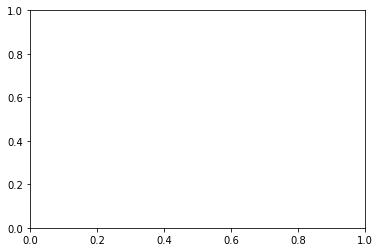

In [10]:
tabular_preview(checkin_data)

In [76]:
A=nx.linalg.graphmatrix.adjacency_matrix(checkins_100_users).todense()
L=nx.linalg.laplacianmatrix.laplacian_matrix(checkins_100_users).todense()

C:\Users\Johan\AppData\Local\Temp\ipykernel_15484\978835093.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A=nx.linalg.graphmatrix.adjacency_matrix(checkins_100_users).todense()


AttributeError: 'DataFrame' object has no attribute 'edges'

In [ ]:
A=
